In [ ]:
path='dataset.csv'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
data = pd.read_csv(path)
print(pd.DataFrame(data))

     Humidity  Temperature
0    0.596606    13.182462
1    0.656572     8.156680
2    0.141856    32.713142
3    0.757360     6.282035
4    0.613228    12.675158
..        ...          ...
295  0.615160     3.892790
296  0.524208    15.616094
297  0.647608     4.596190
298  0.410353    18.160583
299  0.545477    12.561416

[300 rows x 2 columns]


In [ ]:
#training data extraction
n=len(data)
d_tr = data.iloc[:int(n*0.8)]
print(d_tr)

     Humidity  Temperature
0    0.596606    13.182462
1    0.656572     8.156680
2    0.141856    32.713142
3    0.757360     6.282035
4    0.613228    12.675158
..        ...          ...
235  0.449740    10.473785
236  0.638222     5.068468
237  0.000000    43.298697
238  0.443693    17.590152
239  0.594432     9.650354

[240 rows x 2 columns]


In [ ]:
#test data extrantion
d_ts = data.iloc[int(n*0.8):]
print(d_ts)

     Humidity  Temperature
240  0.573247    17.963492
241  0.544092     9.688188
242  0.746652    -4.728179
243  0.680544     0.121390
244  0.726691    11.334751
245  0.621502    10.225213
246  0.629550    14.630749
247  0.529479    18.592511
248  0.620262     8.530652
249  0.671266    12.609810
250  0.558720    18.102120
251  0.728197     8.542317
252  0.382786    29.113795
253  0.447962    23.704203
254  0.390749    32.018262
255  0.562434     9.664922
256  0.538798    18.494122
257  0.521258    19.742954
258  0.527583    26.545957
259  0.680955    -0.285396
260  0.729927     1.773849
261  0.529580    18.095873
262  0.507055    10.214476
263  0.681461    10.241202
264  0.724067     2.579981
265  0.473704    26.027498
266  0.451062    21.619665
267  0.358210    28.186635
268  0.714344     0.301883
269  0.417641    30.675336
270  0.806130     0.476170
271  0.880854   -13.464646
272  0.315603    33.758743
273  0.447798    13.286276
274  0.528479    13.680378
275  0.533753    20.310750
2

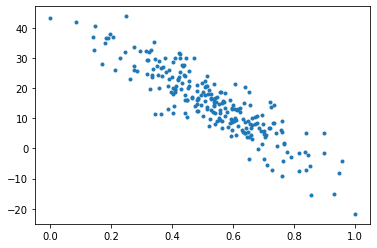

In [ ]:
x = np.array(d_tr.Humidity)
y = np.array(d_tr.Temperature)
print(plt.plot(x,y, '.'))

In [ ]:
np.random.seed(2)
theta = np.random.rand(2,1)
def hypothesis(x, theta):
    return theta[0] + theta[1] * x

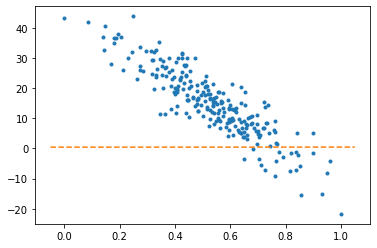

In [ ]:
def line(theta):
    axes = plt.gca()
    x_axis = np.array(axes.get_xlim())
    y_axis = hypothesis(x_axis, theta)
    plt.plot(x_axis,y_axis,'--')
def draw(x, y, theta):
    plt.plot(x,y,'.')
    line(theta)

draw(x,y,theta)

In [ ]:
def cost(x,y,theta):
    return (1/(2*n)) * np.sum((hypothesis(x, theta)-y) ** 2)

cost(x,y,theta)

137.13883911285163

In [ ]:
def grad(x, y, theta, a, step):
    for i in range(step):
        initial_cost = cost(x, y, theta)
        temp0 = theta[0] - a*((1/n)*np.sum(hypothesis(x, theta)-y))
        temp1 = theta[1] - a*((1/n)*np.dot((hypothesis(x, theta)-y),x))
        theta[0] = temp0
        theta[1] = temp1
        final_cost = cost(x, y, theta)
        if final_cost>initial_cost:
            print("Increasing")
        else:
            print("Decreasing", final_cost)

grad(x, y, theta, a=0.1, step=1000)
theta

Decreasing 121.6963577472247
Decreasing 109.23610302578402
Decreasing 99.17550558852246
Decreasing 91.04582455842181
Decreasing 84.46990644942913
Decreasing 79.14428979003931
Decreasing 74.82480634751401
Decreasing 71.31499574743673
Decreasing 68.45678377566539
Decreasing 66.12298205886425
Decreasing 64.21125324210857
Decreasing 62.639255318202174
Decreasing 61.34073471273565
Decreasing 60.26238274627994
Decreasing 59.36130631647313
Decreasing 58.60299278678509
Decreasing 57.95967251828038
Decreasing 57.40900134840204
Decreasing 56.93300050191607
Decreasing 56.517203634014805
Decreasing 56.149970533760346
Decreasing 55.82193492388935
Decreasing 55.52556015571857
Decreasing 55.25478171738851
Decreasing 55.004719592875105
Decreasing 54.77144682353826
Decreasing 54.5518032907209
Decreasing 54.34324588359938
Decreasing 54.1437279429243
Decreasing 53.95160226039751
Decreasing 53.76554303111957
Decreasing 53.584483055842576
Decreasing 53.40756321334952
Decreasing 53.23409180548404
Decreasing

array([[ 40.39122873],
       [-47.78995991]])

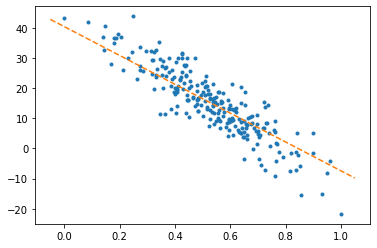

In [ ]:
draw(x, y, theta)

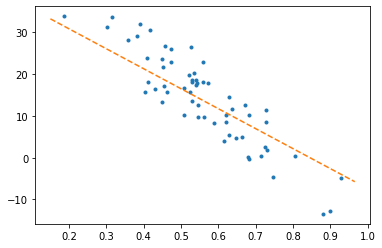

In [ ]:
x_ts = np.array(d_ts.Humidity)
y_ts = np.array(d_ts.Temperature)
draw(x_ts, y_ts, theta)

In [ ]:
def error(a, b, c):
    predict_test = hypothesis(a, theta)
    return abs(b-predict_test)

s = 0
m = len(x_ts)
for i in range(m):
    s = s + error(x_ts[i], y_ts[i], theta)
s/m

array([4.79786934])